# Explore here

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [2]:
df.shape

(41188, 21)

In [3]:
df.info


<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [5]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(41176, 21)

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: xlabel='contact', ylabel='Count'>

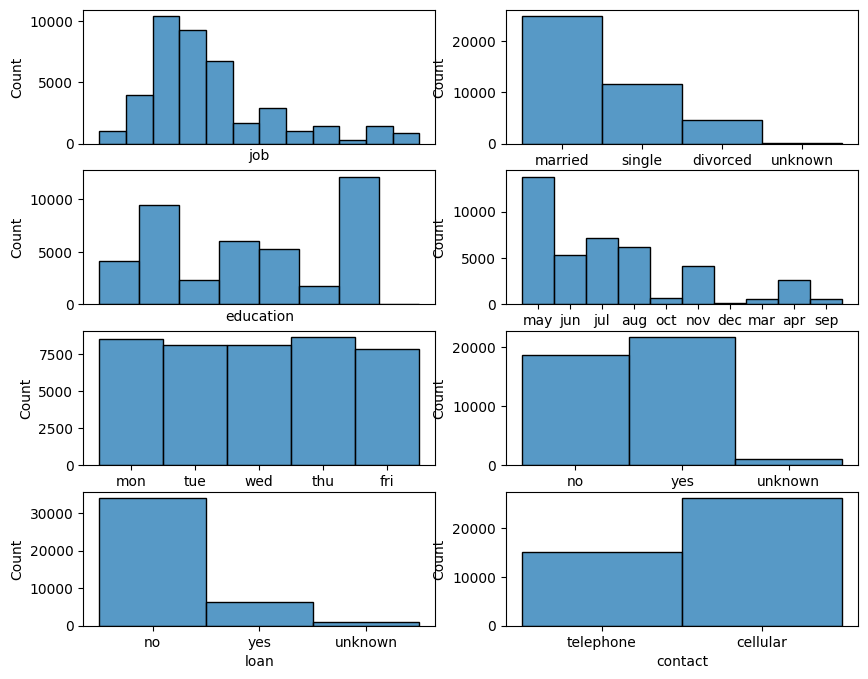

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig,axis = plt.subplots(4,2,figsize=(10,8))

sns.histplot(ax=axis[0,0], data=df, x='job').set_xticks([])
sns.histplot(ax=axis[0,1], data=df, x='marital')
sns.histplot(ax=axis[1,0], data=df, x='education').set_xticks([])
sns.histplot(ax=axis[1,1], data=df, x='month')
sns.histplot(ax=axis[2,0], data=df, x='day_of_week')
sns.histplot(ax=axis[2,1], data=df, x='housing')
sns.histplot(ax=axis[3,0], data=df, x='loan')
sns.histplot(ax=axis[3,1], data=df, x='contact')

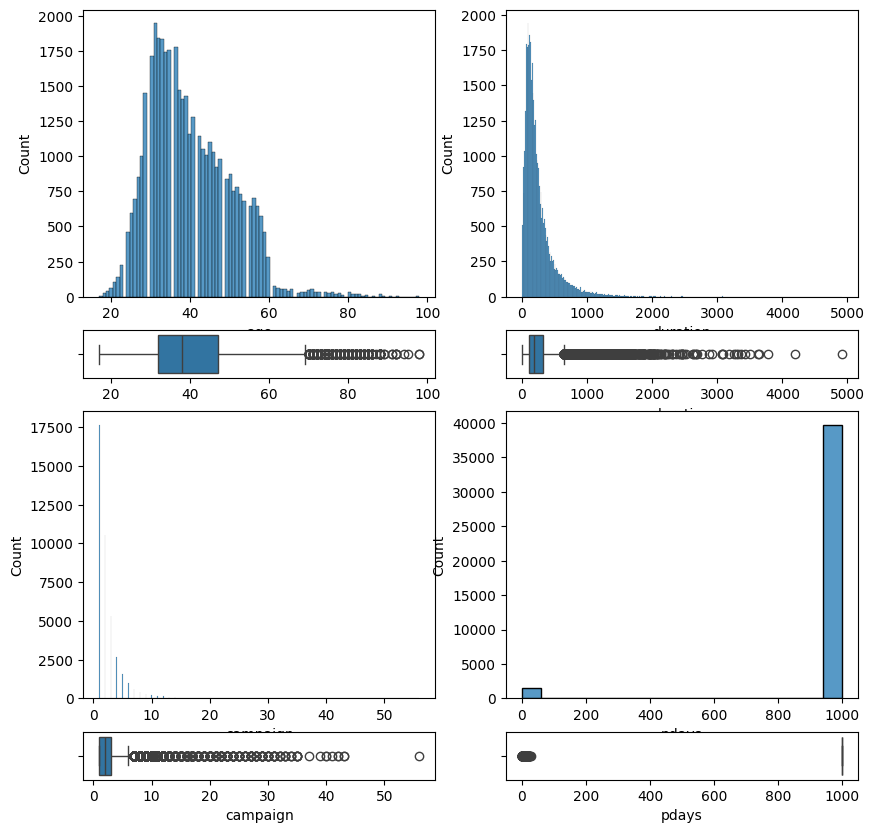

In [8]:
fig,axis = plt.subplots(4,2,figsize=(10,10),gridspec_kw={"height_ratios":[6,1,6,1]})

sns.histplot(ax=axis[0,0],data=df,x='age')
sns.boxplot(ax=axis[1,0],data=df,x='age')

sns.histplot(ax=axis[0,1],data=df,x='duration')
sns.boxplot(ax=axis[1,1],data=df,x='duration')

sns.histplot(ax=axis[2,0],data=df,x='campaign')
sns.boxplot(ax=axis[3,0],data=df,x='campaign')

sns.histplot(ax=axis[2,1],data=df,x='pdays')
sns.boxplot(ax=axis[3,1],data=df,x='pdays')

plt.show()

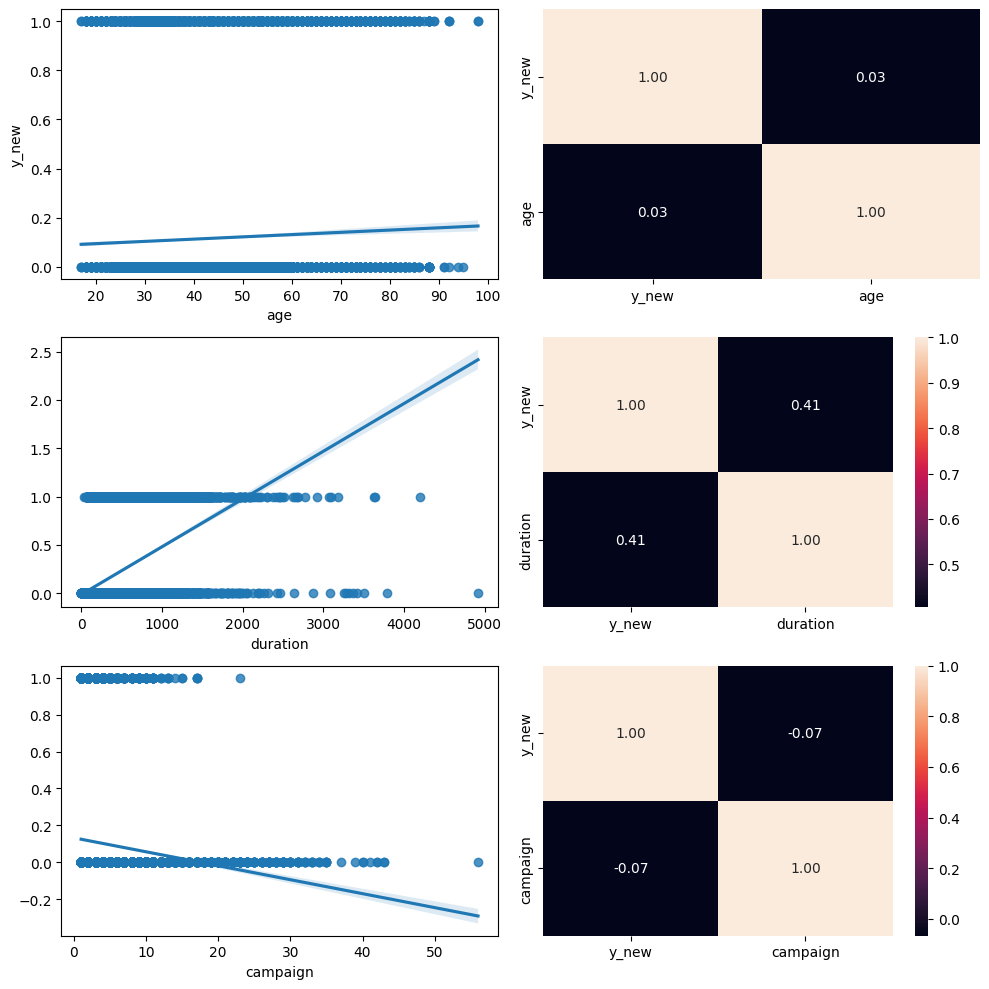

In [10]:
df['y_new'] = df['y'].map({'yes': 1, 'no': 0})

fig, axis = plt.subplots(3, 2, figsize=(10, 10))

sns.regplot(ax=axis[0, 0], data=df, x="age", y="y_new")
sns.heatmap(df[["y_new", "age"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)
sns.regplot(ax=axis[1, 0], data=df, x="duration", y="y_new").set(ylabel=None)
sns.heatmap(df[["y_new", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
sns.regplot(ax=axis[2, 0], data=df, x="campaign", y="y_new").set(ylabel=None)
sns.heatmap(df[["y_new", "campaign"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1])

plt.tight_layout()
plt.show()

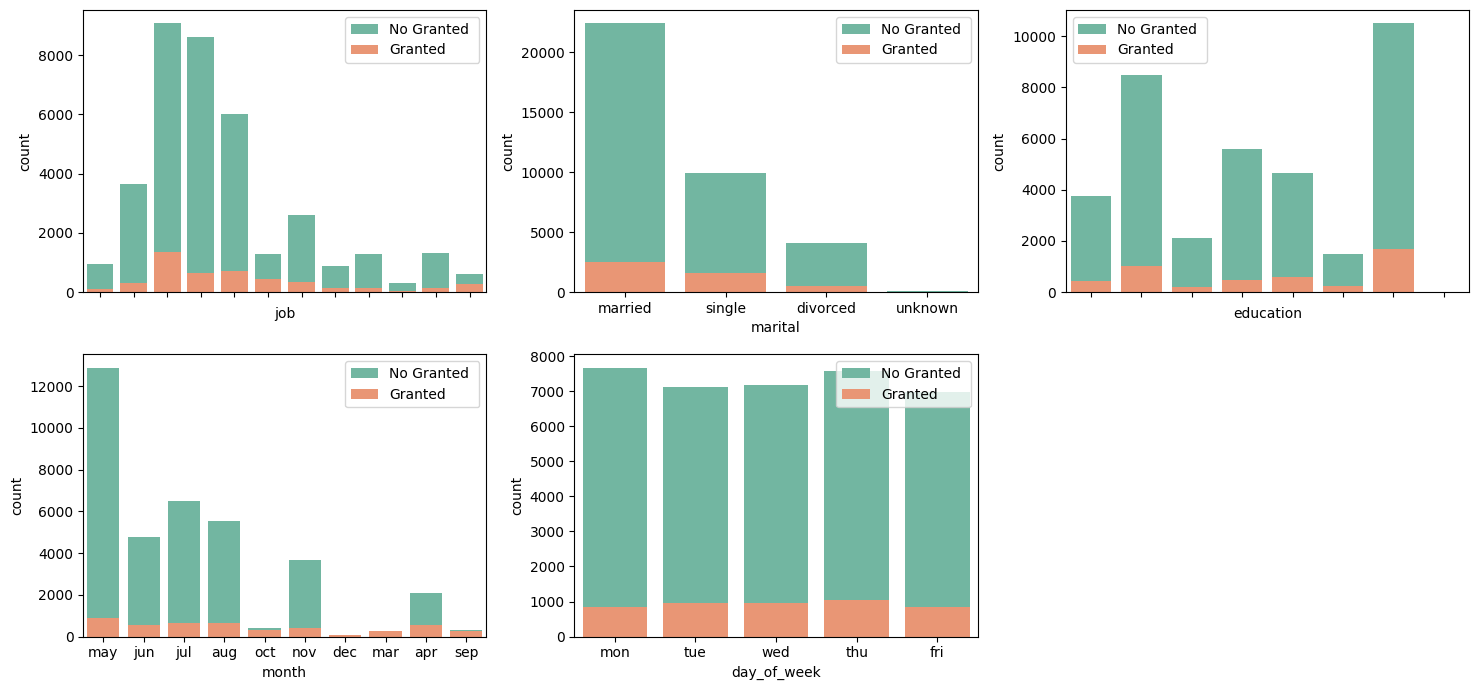

In [11]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = df, x = "job", hue = "y", palette="Set2", dodge=False).set_xticklabels([])
sns.countplot(ax = axis[0, 1], data = df, x = "marital", hue = "y", palette="Set2", dodge=False)
sns.countplot(ax = axis[0, 2], data = df, x = "education", hue = "y", palette="Set2", dodge=False).set_xticklabels([])
sns.countplot(ax = axis[1, 0], data = df, x = "month", hue = "y", palette="Set2", dodge=False)
sns.countplot(ax = axis[1, 1], data = df, x = "day_of_week", hue = "y", palette="Set2", dodge=False)

for ax in axis.flat:
    ax.legend(labels=["No Granted ", "Granted"])

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

In [13]:
df['job_n']=pd.factorize(df['job'])[0]

def factoriza_categoricas(df,variables_categoricas):
    for cat in variables_categoricas:
        cat_n = cat + "_n"
        df[cat_n]=pd.factorize(df[cat])[0]
    return df

df = factoriza_categoricas(df,['marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'])


<Axes: >

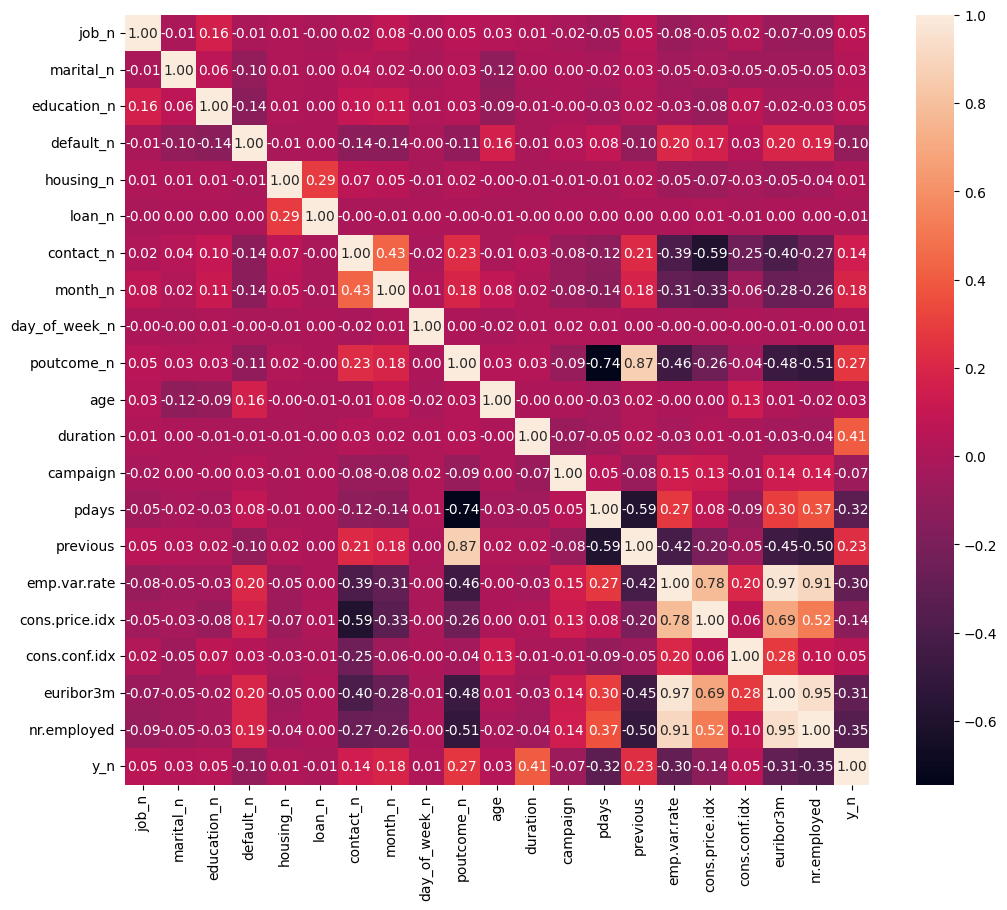

In [14]:
plt.figure(figsize=(12, 10)) 

sns.heatmap(df[["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]].corr(),annot=True,fmt='.2f')


In [16]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

scaler = MinMaxScaler()
variables_escaladas = scaler.fit_transform(df[num_variables])
df = pd.DataFrame(variables_escaladas, index=df.index,columns=num_variables)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest

X = df.drop('y_n', axis=1)
y = df['y_n']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

columns = SelectKBest(chi2,k=16)
columns.fit(X_train,y_train)
ix = columns.get_support()

X_train_sel = pd.DataFrame(columns.transform(X_train),columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(columns.transform(X_test),columns=X_test.columns.values[ix])

X_train_sel.columns

Index(['job_n', 'marital_n', 'education_n', 'default_n', 'contact_n',
       'month_n', 'poutcome_n', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [19]:
X_test_sel['y'] = list(y_test)
X_train_sel['y'] = list(y_train)
X_test_sel.to_csv('../data/processed/clean_test.csv',index = False)
X_train_sel.to_csv('../data/processed/clean_train.csv',index = False)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sel, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test_sel)
y_pred

array([1., 0., 1., ..., 0., 0., 0.])

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [ ]:
##lagrilla es para mejorar el modelo pero tuve acurracy de 1? asi que sin Run
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}


grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid




In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_sel, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

In [ ]:
model_hyp = LogisticRegression(C=0.001,penalty=None,solver='newton-cg')

model_hyp.fit(X_train_sel,y_train)

y_pred2 = model_hyp.predict(X_test_sel)

accuracy_score(y_test,y_pred2)